In [139]:
# Imports
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
train_dataset = load_dataset('train.csv')

test_dataset = load_dataset('test.csv')

In [3]:
train_dataset

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.000,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.000,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.000,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.000,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.000,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.000,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.000,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.000,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.000,neutral or dissatisfied


In [4]:
# Anem a veure quants valors nul tenim al train
print("Per comptar el nombre de valors no existents:")
print(train_dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Del

In [5]:
# Veiem que tenim 310 nuls de 103904 a 'Arrival Delay in Minutes'. El que faré és eliminar aquestes dades, ja que són molt poques comparant amb el total 
train_dataset = train_dataset.dropna().copy()

In [6]:
# Anem a veure quants valors nul tenim al test
print("Per comptar el nombre de valors no existents:")
print(test_dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes          

In [7]:
# Veiem que tenim 83 nuls de 25976 a 'Arrival Delay in Minutes'. El que faré és eliminar aquestes dades, ja que són molt poques comparant amb el total  
test_dataset = test_dataset.dropna().copy()

In [8]:
# Mirem de quin tipus són els atributs
print("Per visualitzar informació de la BBDD:")
train_dataset.info()

Per visualitzar informació de la BBDD:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  

In [9]:
# Convertim els atributs de tipus 'objecte' en números (del train_dataset i del test_dataset) 

cnt_gender = train_dataset['Gender'].value_counts().to_frame()
cnt_customer_type = train_dataset["Customer Type"].value_counts().to_frame()
cnt_type_travel = train_dataset['Type of Travel'].value_counts().to_frame()
cnt_class = train_dataset["Class"].value_counts().to_frame()
cnt_satisfaction = train_dataset['satisfaction'].value_counts().to_frame()
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
train_dataset.iloc[:,2] = le.fit_transform(train_dataset.iloc[:,2])
train_dataset.iloc[:,3] = le.fit_transform(train_dataset.iloc[:,3])
train_dataset.iloc[:,5] = le.fit_transform(train_dataset.iloc[:,5])
train_dataset.iloc[:,6] = le.fit_transform(train_dataset.iloc[:,6])
train_dataset.iloc[:,24] = le.fit_transform(train_dataset.iloc[:,24])

train_data = train_dataset.values

cnt_gender = test_dataset['Gender'].value_counts().to_frame()
cnt_customer_type = test_dataset["Customer Type"].value_counts().to_frame()
cnt_type_travel = test_dataset['Type of Travel'].value_counts().to_frame()
cnt_class = test_dataset["Class"].value_counts().to_frame()
cnt_satisfaction = test_dataset['satisfaction'].value_counts().to_frame()
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
test_dataset.iloc[:,2] = le.fit_transform(test_dataset.iloc[:,2])
test_dataset.iloc[:,3] = le.fit_transform(test_dataset.iloc[:,3])
test_dataset.iloc[:,5] = le.fit_transform(test_dataset.iloc[:,5])
test_dataset.iloc[:,6] = le.fit_transform(test_dataset.iloc[:,6])
test_dataset.iloc[:,24] = le.fit_transform(test_dataset.iloc[:,24])

test_data = test_dataset.values

In [10]:
# Eliminar les columnes "Unnamed: 0" i "id" del dataset del train i del test, ja que no ens aporten res
train_dataset.drop("Unnamed: 0",axis=1,inplace=True)
train_dataset.drop("id",axis=1,inplace=True)
test_dataset.drop("Unnamed: 0",axis=1,inplace=True)
test_dataset.drop("id",axis=1,inplace=True)

In [11]:
print("Per visualitzar les primeres 5 mostres de la BBDD de train:")
train_dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD de train:


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.000,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.000,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.000,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.000,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.000,1


In [12]:
print("Per visualitzar les primeres 5 mostres de la BBDD de test:")
test_dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD de test:


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.000,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.000,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.000,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.000,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.000,1


In [13]:
print("Per visualitzar informació de la BBDD de train:")
train_dataset.info()

Per visualitzar informació de la BBDD de train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int32  
 1   Customer Type                      103594 non-null  int32  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  int32  
 4   Class                              103594 non-null  int32  
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int6

In [14]:
print("Per visualitzar informació de la BBDD de test:")
test_dataset.info()

Per visualitzar informació de la BBDD de test:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int32  
 1   Customer Type                      25893 non-null  int32  
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  int32  
 4   Class                              25893 non-null  int32  
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online 

In [15]:
print("Per veure estadístiques dels atributs numèrics de la BBDD de train:")
train_dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD de train:


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000,...,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000,103594.000
mean,0.492,0.183,39.380,0.310,0.594,1189.325,2.730,3.060,2.757,2.977,...,3.358,3.383,3.351,3.632,3.304,3.641,3.286,14.748,15.179,0.433
std,0.500,0.386,15.113,0.463,0.621,997.297,1.328,1.525,1.399,1.278,...,1.333,1.288,1.315,1.181,1.265,1.176,1.312,38.117,38.699,0.496
min,0.000,0.000,7.000,0.000,0.000,31.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,27.000,0.000,0.000,414.000,2.000,2.000,2.000,2.000,...,2.000,2.000,2.000,3.000,3.000,3.000,2.000,0.000,0.000,0.000
50%,0.000,0.000,40.000,0.000,1.000,842.000,3.000,3.000,3.000,3.000,...,4.000,4.000,4.000,4.000,3.000,4.000,3.000,0.000,0.000,0.000
75%,1.000,0.000,51.000,1.000,1.000,1743.000,4.000,4.000,4.000,4.000,...,4.000,4.000,4.000,5.000,4.000,5.000,4.000,12.000,13.000,1.000
max,1.000,1.000,85.000,1.000,2.000,4983.000,5.000,5.000,5.000,5.000,...,5.000,5.000,5.000,5.000,5.000,5.000,5.000,1592.000,1584.000,1.000


In [16]:
# Veiem que el nombre màxim de 'Departure Delay in Minutes' és molt gran (1592.000)
# Veiem que el nombre màxim de 'Arrival Delay in Minutes' és molt gran (1584.000)
# Això sembla que és a causa de outliers. Anem a comprovar-ho amb boxplots.

<IPython.core.display.Javascript object>


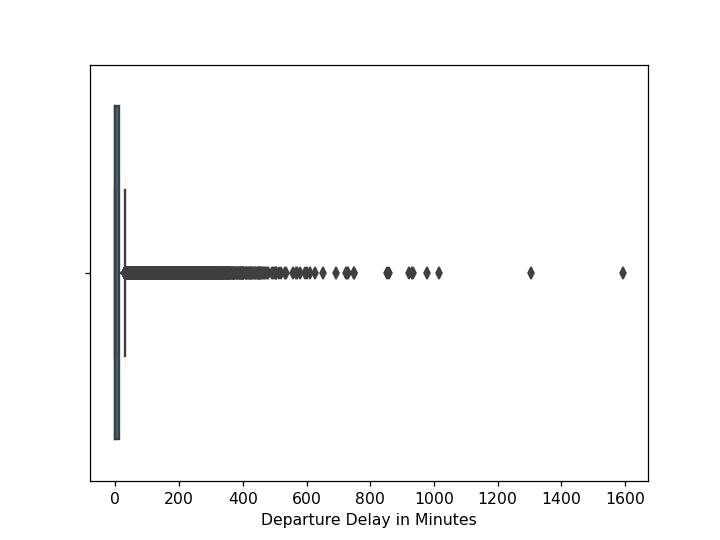

<AxesSubplot:xlabel='Departure Delay in Minutes'>

In [17]:
# Boxplot de l'atribut 'Departure Delay in Minutes'
plt.figure()
departure = sns.boxplot(x=train_dataset['Departure Delay in Minutes'])
departure

<IPython.core.display.Javascript object>


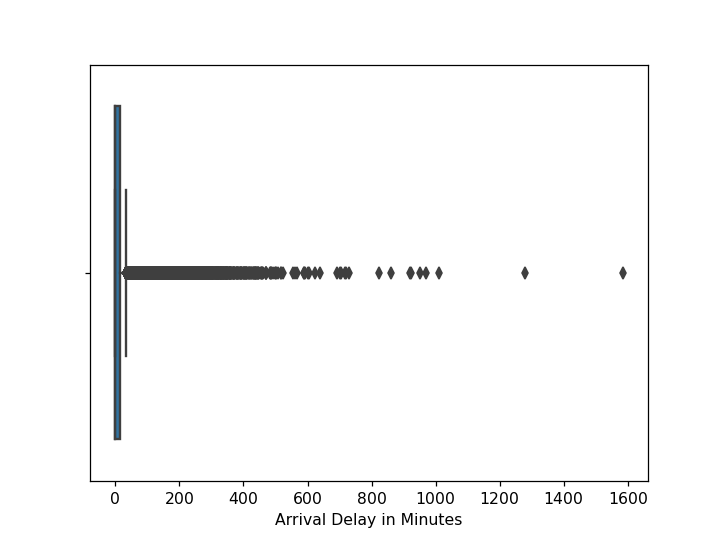

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

In [18]:
# Boxplot de l'atribut 'Arrival Delay in Minutes'
plt.figure()
arrival_delay = sns.boxplot(x=train_dataset['Arrival Delay in Minutes'])
arrival_delay

In [21]:
# Veiem que, efectivament, aquests valors són outliers.
# Com que el nostre dataset és molt gran i no volem que aquests outliers ens esbiaixin el nostre dataset, els eliminem
outliers = train_dataset[train_dataset['Arrival Delay in Minutes'] > 1250].index
train_dataset.drop(outliers, inplace=True)

In [22]:
print("Per veure estadístiques dels atributs numèrics de la BBDD de test:")
test_dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD de test:


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000,...,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000,25893.000
mean,0.493,0.185,39.622,0.306,0.593,1193.753,2.724,3.046,2.756,2.976,...,3.357,3.386,3.350,3.633,3.314,3.649,3.286,14.225,14.741,0.439
std,0.500,0.388,15.134,0.461,0.624,998.627,1.335,1.533,1.413,1.282,...,1.339,1.282,1.319,1.176,1.269,1.181,1.319,37.186,37.518,0.496
min,0.000,0.000,7.000,0.000,0.000,31.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,27.000,0.000,0.000,414.000,2.000,2.000,2.000,2.000,...,2.000,2.000,2.000,3.000,3.000,3.000,2.000,0.000,0.000,0.000
50%,0.000,0.000,40.000,0.000,1.000,849.000,3.000,3.000,3.000,3.000,...,4.000,4.000,4.000,4.000,3.000,4.000,3.000,0.000,0.000,0.000
75%,1.000,0.000,51.000,1.000,1.000,1744.000,4.000,4.000,4.000,4.000,...,4.000,4.000,4.000,5.000,4.000,5.000,4.000,12.000,13.000,1.000
max,1.000,1.000,85.000,1.000,2.000,4983.000,5.000,5.000,5.000,5.000,...,5.000,5.000,5.000,5.000,5.000,5.000,5.000,1128.000,1115.000,1.000


Decidim que la nostre varaible a predir és l'atribut 'satisfaction', ja que volem veure, a partir de tots els factors que afecten al vol, si els clients surten satisfets o no.

In [23]:
# Defineixo els atributs dependents (X) i els atributs independents (Y) de la base de dades del train i del test

train_data = train_dataset.values
test_data = test_dataset.values

x_train = train_data[:, :-1]
y_train = train_data[:, -1] 

print("Dimensionalitat de la BBDD de train:", train_dataset.shape) #shape of the data
print("Dimensionalitat de les entrades X de train", x_train.shape)
print("Dimensionalitat de l'atribut Y de train", y_train.shape)
print(" ")

x_test = test_data[:, :-1]
y_test = test_data[:, -1] 

print("Dimensionalitat de la BBDD de test:", test_dataset.shape) #shape of the data
print("Dimensionalitat de les entrades X de test", x_test.shape)
print("Dimensionalitat de l'atribut Y de test", y_test.shape)

Dimensionalitat de la BBDD de train: (103592, 23)
Dimensionalitat de les entrades X de train (103592, 22)
Dimensionalitat de l'atribut Y de train (103592,)
 
Dimensionalitat de la BBDD de test: (25893, 23)
Dimensionalitat de les entrades X de test (25893, 22)
Dimensionalitat de l'atribut Y de test (25893,)


A continuació el que farem serà analitzar els diferents atributs per veure com es relacionen amb l'atribut y.
Ho farem de diferent manera pels atributs categòrics i els quantitatius.

Comencem amb els atributs categòrics, mirem les estadístiques del nombre de clients satisfets i no satisfets de cada categoria del atribut.

<IPython.core.display.Javascript object>


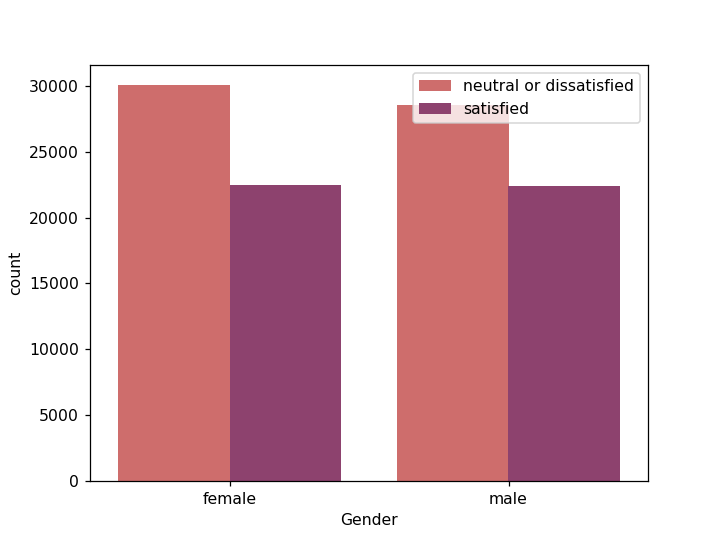

Percentatge de dones satisfetes: 42.73704232049453
Percentatge de dones neutrals o no satisfetes: 57.26295767950547
Percentatge d'homes satisfets: 43.95985651841543
Percentatge d'homes neutrals o no satisfets: 56.04014348158457


In [23]:
# GENDER

plt.figure()
sns.countplot(x ='Gender', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.xticks([0,1],['female','male'])
plt.show()

num_rows = train_dataset.shape[0]
satisfied_females = 0
dissatisfied_females = 0
satisfied_males = 0
dissatisfied_males = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Gender'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_females += 1
    if(train_dataset.iloc[i]['Gender'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_females += 1
    if(train_dataset.iloc[i]['Gender'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_males += 1
    if(train_dataset.iloc[i]['Gender'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_males += 1
print("Percentatge de dones satisfetes:", satisfied_females / ((satisfied_females + dissatisfied_females))*100)
print("Percentatge de dones neutrals o no satisfetes:", dissatisfied_females / ((satisfied_females + dissatisfied_females))*100)
print("Percentatge d'homes satisfets:", satisfied_males / ((satisfied_males + dissatisfied_males))*100)
print("Percentatge d'homes neutrals o no satisfets:", dissatisfied_males / ((satisfied_males + dissatisfied_males))*100)

Podem veure que el tant per cent d'homes satisfets és molt semblant al de dones satisfetes.
Tant en el cas dels homes com en el de les dones hi ha més valoracions del tipus 'neutre o no satisfactori'.

<IPython.core.display.Javascript object>


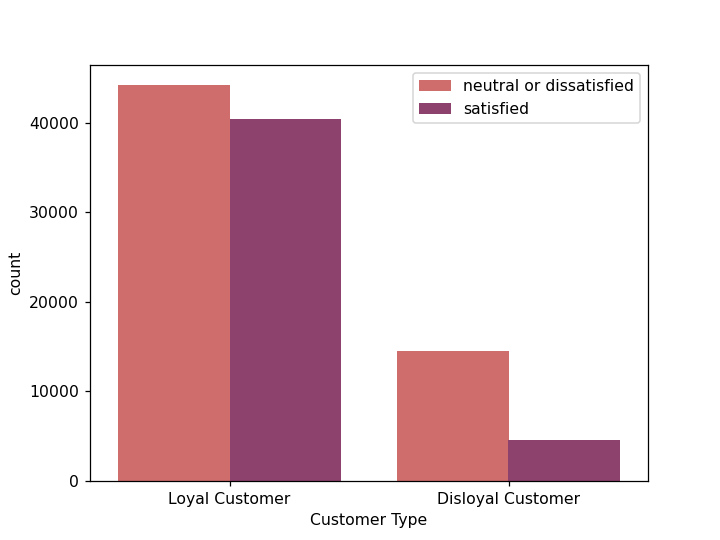

Percentatge de clients lleials satisfets: 47.73446728088826
Percentatge de clients lleials neutrals o no satisfets: 52.26553271911174
Percentatge de clients deslleials satisfets: 23.684766532854425
Percentatge de clients deslleials neutrals o no satisfets: 76.31523346714557


In [24]:
# CUSTOMER TYPE

plt.figure()
sns.countplot(x ='Customer Type', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.xticks([0,1],['Loyal Customer','Disloyal Customer'])
plt.show()

num_rows = train_dataset.shape[0]
satisfied_loyal = 0
dissatisfied_loyal = 0
satisfied_disloyal = 0
dissatisfied_disloyal = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Customer Type'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_loyal += 1
    if(train_dataset.iloc[i]['Customer Type'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_loyal += 1
    if(train_dataset.iloc[i]['Customer Type'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_disloyal += 1
    if(train_dataset.iloc[i]['Customer Type'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_disloyal += 1
print("Percentatge de clients lleials satisfets:", satisfied_loyal / ((satisfied_loyal + dissatisfied_loyal))*100)
print("Percentatge de clients lleials neutrals o no satisfets:", dissatisfied_loyal / ((satisfied_loyal + dissatisfied_loyal))*100)
print("Percentatge de clients deslleials satisfets:", satisfied_disloyal / ((satisfied_disloyal + dissatisfied_disloyal))*100)
print("Percentatge de clients deslleials neutrals o no satisfets:", dissatisfied_disloyal / ((satisfied_disloyal + dissatisfied_disloyal))*100)

Podem veure que tant en el cas de clients lleials o no lleials, el nombre de valoracions neutrals o no saisfactories és molt alt.
Tot i així, la diferència de valoracions satisfactories contra les neutrals o no satisfactories és major en els clients no lleials que en els lleials.

<IPython.core.display.Javascript object>


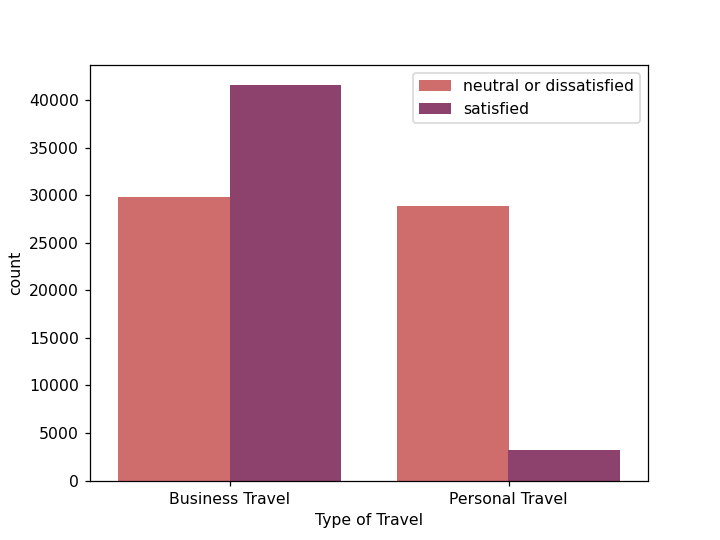

Percentatge de viatges de negocis satisfets: 58.257304377028994
Percentatge de viatges de negocis neutrals o no satisfets: 41.742695622971006
Percentatge de viatges personals satisfets: 10.15625
Percentatge de viatges personals neutrals o no satisfets: 89.84375


In [25]:
# TYPE OF TRAVEL

plt.figure()
sns.countplot(x ='Type of Travel', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.xticks([0,1],['Business Travel','Personal Travel'])
plt.show()

num_rows = train_dataset.shape[0]
satisfied_business = 0
dissatisfied_business = 0
satisfied_personal = 0
dissatisfied_personal = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Type of Travel'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_business += 1
    if(train_dataset.iloc[i]['Type of Travel'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_business += 1
    if(train_dataset.iloc[i]['Type of Travel'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_personal += 1
    if(train_dataset.iloc[i]['Type of Travel'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_personal += 1
print("Percentatge de viatges de negocis satisfets:", satisfied_business / ((satisfied_business + dissatisfied_business))*100)
print("Percentatge de viatges de negocis neutrals o no satisfets:", dissatisfied_business / ((satisfied_business + dissatisfied_business))*100)
print("Percentatge de viatges personals satisfets:", satisfied_personal / ((satisfied_personal + dissatisfied_personal))*100)
print("Percentatge de viatges personals neutrals o no satisfets:", dissatisfied_personal / ((satisfied_personal + dissatisfied_personal))*100)

Veiem que tenim molts més clients que viatgen per negocis que per gust.
podem observar que dels clients que viatgen per negocis, hi ha més de satisfets (casi el 60%!) que de neutrals o no satisfets. En canvi, dels que viatgen per que volen hi ha més de neutrals o no satisfets (casi 90%) que satisfets.

In [28]:
# CLASS

plt.figure()
sns.countplot(x ='Class', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.xticks([0,1,2],['Business','Eco','Eco Plus'])
plt.show()

num_rows = train_dataset.shape[0]
satisfied_business = 0
dissatisfied_business = 0
satisfied_eco = 0
dissatisfied_eco = 0
satisfied_ecoplus = 0
dissatisfied_ecoplus = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Class'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_business += 1
    if(train_dataset.iloc[i]['Class'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_business += 1
    if(train_dataset.iloc[i]['Class'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_eco += 1
    if(train_dataset.iloc[i]['Class'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_eco += 1
    if(train_dataset.iloc[i]['Class'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_ecoplus += 1
    if(train_dataset.iloc[i]['Class'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_ecoplus += 1
print("Percentatge de viatges de classe business satisfets:", satisfied_business / ((satisfied_business + dissatisfied_business))*100)
print("Percentatge de viatges de classe business neutrals o no satisfets:", dissatisfied_business / ((satisfied_business + dissatisfied_business))*100)
print("Percentatge de viatges de classe eco satisfets:", satisfied_eco / ((satisfied_eco + dissatisfied_eco))*100)
print("Percentatge de viatges de classe eco neutrals o no satisfets:", dissatisfied_eco / ((satisfied_eco + dissatisfied_eco))*100)
print("Percentatge de viatges de classe eco plus satisfets:", satisfied_ecoplus / ((satisfied_ecoplus + dissatisfied_ecoplus))*100)
print("Percentatge de viatges de classe eco plus neutrals o no satisfets:", dissatisfied_ecoplus / ((satisfied_ecoplus + dissatisfied_ecoplus))*100)

<IPython.core.display.Javascript object>

Percentatge de viatges de classe business satisfets: 69.42784462569652
Percentatge de viatges de classe business neutrals o no satisfets: 30.572155374303478
Percentatge de viatges de classe eco satisfets: 18.610491071428573
Percentatge de viatges de classe eco neutrals o no satisfets: 81.38950892857143
Percentatge de viatges de classe eco plus satisfets: 24.58489555436529
Percentatge de viatges de classe eco plus neutrals o no satisfets: 75.41510444563471


Com podem veure, la única classe en la que la majoria de passatgers estàn satisfets és la business. En la que estan menys satisfets és en la classe econònica.

In [29]:
# INFLIGHT WIFI SERVICE

plt.figure()
sns.countplot(x ='Inflight wifi service', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Inflight wifi service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Inflight wifi service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de servei de wifi valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei de wifi valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei de wifi valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei de wifi valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei de wifi valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei de wifi valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei de wifi valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei de wifi valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei de wifi valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei de wifi valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei de wifi valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de servei de wifi valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

<IPython.core.display.Javascript object>

Percentatge de servei de wifi valorat amb 0 satisfets: 99.74160206718346
Percentatge de servei de wifi valorat amb 0 neutrals o no satisfets: 0.2583979328165375
Percentatge de servei de wifi valorat amb 1 satisfets: 32.54035206118891
Percentatge de servei de wifi valorat amb 1 neutrals o no satisfets: 67.4596479388111
Percentatge de servei de wifi valorat amb 2 satisfets: 24.882537956742905
Percentatge de servei de wifi valorat amb 2 neutrals o no satisfets: 75.1174620432571
Percentatge de servei de wifi valorat amb 3 satisfets: 25.05719492807011
Percentatge de servei de wifi valorat amb 3 neutrals o no satisfets: 74.9428050719299
Percentatge de servei de wifi valorat amb 4 satisfets: 59.897654152100124
Percentatge de servei de wifi valorat amb 4 neutrals o no satisfets: 40.10234584789988
Percentatge de servei de wifi valorat amb 5 satisfets: 99.0731024833858
Percentatge de servei de wifi valorat amb 5 neutrals o no satisfets: 0.9268975166142007


Com podem veure, els únics grups de valoració del servei de wifi on hi ha molta més gent que està satisfeta del seu vol són els que han valorat el servei de wifi amb 0, 4 i 5. Té sentit que la gent que ha valorat el servei de wifi amb 4 o 5 acabi estant satisfeta del seu vol, ja que si has tingut una bona experiència amb el wifi és més fàcil que acabis content que si no l'has tingut. El que és més extrany que també casi tothom que ha valorat el wifi amb un 0 estiguin satisfets del vol. Potser és perquè no ho han fet servir, o perquè per a ells és algo que no té importància.

In [30]:
# DEPARTURE/ARRIVAL TIME CONVENIENT

plt.figure()
sns.countplot(x ='Departure/Arrival time convenient', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Departure/Arrival time convenient'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge d'hora de sortida/arrivada convenient valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

<IPython.core.display.Javascript object>

Percentatge d'hora de sortida/arrivada convenient valorat amb 0 satisfets: 47.561436672967865
Percentatge d'hora de sortida/arrivada convenient valorat amb 0 neutrals o no satisfets: 52.43856332703214
Percentatge d'hora de sortida/arrivada convenient valorat amb 1 satisfets: 48.660367589955996
Percentatge d'hora de sortida/arrivada convenient valorat amb 1 neutrals o no satisfets: 51.33963241004401
Percentatge d'hora de sortida/arrivada convenient valorat amb 2 satisfets: 44.562427071178526
Percentatge d'hora de sortida/arrivada convenient valorat amb 2 neutrals o no satisfets: 55.43757292882147
Percentatge d'hora de sortida/arrivada convenient valorat amb 3 satisfets: 43.83064290900967
Percentatge d'hora de sortida/arrivada convenient valorat amb 3 neutrals o no satisfets: 56.16935709099033
Percentatge d'hora de sortida/arrivada convenient valorat amb 4 satisfets: 38.780717594409985
Percentatge d'hora de sortida/arrivada convenient valorat amb 4 neutrals o no satisfets: 61.21928240559

Pel que fa a l'hora de sortida/arrivada convenient del vol, podem veure que a tots els grups de valoracions (del 0 al 5) la majoria de passatgers han acabat fent una valoració de 'neutral o no satisfet' del vol. Una cosa a destacar és que com més han valorat l'hora de sortida/arrivada, més gran és la diferència entre el percentatge de gent que ha valorat amb 'neutral o no satisfet' el vol i la gent que l'ha valorat amb 'satisfet'.

In [31]:
# EASE OF ONLINE BOOKING

plt.figure()
sns.countplot(x ='Ease of Online booking', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Ease of Online booking'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Ease of Online booking'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de facilitat de reserva online valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de facilitat de reserva online valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de facilitat de reserva online valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de facilitat de reserva online valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de facilitat de reserva online valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de facilitat de reserva online valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de facilitat de reserva online valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de facilitat de reserva online valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de facilitat de reserva online valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de facilitat de reserva online valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de facilitat de reserva online valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de facilitat de reserva online valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

<IPython.core.display.Javascript object>

Percentatge de facilitat de reserva online valorat amb 0 satisfets: 66.4654594232059
Percentatge de facilitat de reserva online valorat amb 0 neutrals o no satisfets: 33.5345405767941
Percentatge de facilitat de reserva online valorat amb 1 satisfets: 37.61021413031032
Percentatge de facilitat de reserva online valorat amb 1 neutrals o no satisfets: 62.38978586968968
Percentatge de facilitat de reserva online valorat amb 2 satisfets: 30.417362270450752
Percentatge de facilitat de reserva online valorat amb 2 neutrals o no satisfets: 69.58263772954925
Percentatge de facilitat de reserva online valorat amb 3 satisfets: 30.82478457119409
Percentatge de facilitat de reserva online valorat amb 3 neutrals o no satisfets: 69.17521542880591
Percentatge de facilitat de reserva online valorat amb 4 satisfets: 53.08591347139635
Percentatge de facilitat de reserva online valorat amb 4 neutrals o no satisfets: 46.91408652860365
Percentatge de facilitat de reserva online valorat amb 5 satisfets: 73.

Com podem veure, els únics grups de valoració de la facilitat de reserva online on hi ha molta més gent que està satisfeta del seu vol són els que han valorat la facilitat de reserva online amb 0, 4 i 5. Té sentit que la gent que ha valorat el servei de reserva online amb 4 o 5 acabi estant satisfeta del seu vol, ja que si has tingut una bona experiència reservant online el vol és més fàcil que acabis content que si no l'has tingut. El que és més extrany que també casi tothom que ha valorat el servei de reserva online amb un 0 estiguin satisfets del vol. Potser és perquè no ho han fet servir, o perquè per a ells és algo que no té importància.

In [ ]:
# GATE LOCATION

plt.figure()
sns.countplot(x ='Gate location', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Gate location'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Gate location'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Gate location'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Gate location'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Gate location'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Gate location'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Gate location'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Gate location'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Gate location'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Gate location'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Gate location'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Gate location'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de localització de la porta d'embarcament valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de localització de la porta d'embarcament valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

<IPython.core.display.Javascript object>

Podem veure que només la majoria de passatgers que han valorat la localització de la porta d'embarcament amb un 5 han dit que estan satisfets del vol. També és el cas dels que han valorat la localització de la porta d'embarcament amb un 0, però aquests no els tindrem en compte, ja que són molt pocs els que han fet aquesta valoració.

In [ ]:
# FOOD AND DRINK

plt.figure()
sns.countplot(x ='Food and drink', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Food and drink'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Food and drink'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de mejar i beguda valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de mejar i beguda valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de mejar i beguda valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de mejar i beguda valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de mejar i beguda valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de mejar i beguda valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de mejar i beguda valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de mejar i beguda valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de mejar i beguda valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de mejar i beguda valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de mejar i beguda valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de mejar i beguda valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Veiem que només la majoria dels passatgers que han valorat el menjar i la beguda amb un 4 o un 5 han dit que el vol ha estat satisfactori. El grup on hi ha més diferència entre els que han dit que el vol ha estat 'neutral o no satisfactori' i els que l'han considerat 'satisfactori' és el dels que han valorat el menjar i la beguda amb un 1. 

In [ ]:
# ONLINE BOARDING

plt.figure()
sns.countplot(x ='Online boarding', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Online boarding'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Online boarding'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge d'embarcament online valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge d'embarcament online valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge d'embarcament online valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge d'embarcament online valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge d'embarcament online valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge d'embarcament online valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge d'embarcament online valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge d'embarcament online valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge d'embarcament online valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge d'embarcament online valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge d'embarcament online valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge d'embarcament online valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Com podem veure, els únics grups de valoració de l'embarcament online on hi ha molta més gent que està satisfeta del seu vol són els que han valorat l'embarcament online amb 0, 4 i 5. Té sentit que la gent que ha valorat l'embarcament amb 4 o 5 acabi estant satisfeta del seu vol, ja que si has tingut una bona experiència embarcant online és més fàcil que acabis content que si no l'has tingut. El que és més extrany és que la majoria que ha valorat l'embarcament online amb un 0 estiguin satisfets del vol. Potser és perquè no ho han fet servir, o perquè per a ells és algo que no té importància.

In [ ]:
# SEAT COMFORT

plt.figure()
sns.countplot(x ='Seat comfort', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Seat comfort'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Seat comfort'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de comoditat del seient valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de comoditat del seient valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de comoditat del seient valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de comoditat del seient valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de comoditat del seient valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de comoditat del seient valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de comoditat del seient valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de comoditat del seient valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de comoditat del seient valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de comoditat del seient valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de comoditat del seient valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de comoditat del seient valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Com podem veure, els únics grups de valoració de la comoditat del seient on hi ha molta més gent que està satisfeta del seu vol són els que han valorat la comoditat del seient amb 0, 4 i 5. Té sentit que la gent que ha valorat la comoditat del seient amb 4 o 5 acabi estant satisfeta del seu vol, ja que si el seient era còmode és més fàcil que acabis content que si no ho era. 

In [ ]:
# INFLIGHT ENTERTAINMENT

plt.figure()
sns.countplot(x ='Inflight entertainment', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Inflight entertainment'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Inflight entertainment'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge d'entreteniment durant el vol valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge d'entreteniment durant el vol valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Com podem veure, els únics grups de valoració de l'entreteniment durant el vol on hi ha molta més gent que està satisfeta del seu vol són els que han valorat l'entreteniment durant el vol amb 0, 4 i 5. Té sentit que la gent que ha valorat l'entreteniment durant el vol amb 4 o 5 acabi estant satisfeta del seu vol, ja que si hi ha hagut un bon entreteniment és més fàcil que acabis content que si no hi ha hagut. 

In [ ]:
# ON-BOARD SERVICE

plt.figure()
sns.countplot(x ='On-board service', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['On-board service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['On-board service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['On-board service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['On-board service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['On-board service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['On-board service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['On-board service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['On-board service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['On-board service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['On-board service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['On-board service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['On-board service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de servei a bord valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei a bord valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei a bord valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei a bord valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei a bord valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei a bord valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei a bord valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei a bord valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei a bord valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei a bord valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei a bord valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de servei a bord valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Com podem veure, els únics grups de valoració del servei durant el vol on hi ha molta més gent que està satisfeta del seu vol són els que han valorat el servei durant el vol amb 0, 4 i 5. Té sentit que la gent que ha valorat el servei durant el vol amb 4 o 5 acabi estant satisfeta del seu vol, ja que si hi ha hagut un bon servei és més fàcil que acabis content que si no hi ha hagut. 

In [ ]:
# LEG ROOM SERVICE

plt.figure()
sns.countplot(x ='Leg room service', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Leg room service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Leg room service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de l'espai per posar les cames al seient valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de l'espai per posar les cames al seient valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Com podem veure, els únics grups de valoració de l'espai per posar les cames al seient on hi ha molta més gent que està satisfeta del seu vol són els que han valorat l'espai per posar les cames al seient amb 0, 4 i 5. Té sentit que la gent que ha valorat l'espai per posar les cames al seient amb 4 o 5 acabi estant satisfeta del seu vol, ja que si hi ha hagut un bon espai per posar les cames al seient és més fàcil que acabis content que si no hi ha hagut. 

In [ ]:
# BAGGAGE HANDLING

plt.figure()
sns.countplot(x ='Baggage handling', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Baggage handling'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Baggage handling'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Baggage handling'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Baggage handling'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Baggage handling'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Baggage handling'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Baggage handling'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Baggage handling'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Baggage handling'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Baggage handling'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1

print("Percentatge de la manipulació de l'equipatge valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de la manipulació de l'equipatge valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de la manipulació de l'equipatge valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de la manipulació de l'equipatge valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de la manipulació de l'equipatge valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de la manipulació de l'equipatge valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de la manipulació de l'equipatge valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de la manipulació de l'equipatge valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de la manipulació de l'equipatge valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de la manipulació de l'equipatge valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Com podem veure, l'únic grup de valoració de la manipulació de l'equipatge on hi ha molta més gent que està satisfeta del seu vol és el que ha valorat la manipulació de l'equipatge amb un 5. Té sentit que la gent que ha valorat la manipulació de l'equipatge amb 5 acabi estant satisfeta del seu vol, ja que si hi ha hagut un bon servei és més fàcil que acabis content que si no hi ha hagut. 

In [ ]:
# CHECK-IN SERVICE

plt.figure()
sns.countplot(x ='Checkin service', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Checkin service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Checkin service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de servei check-in valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei check-in valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei check-in valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei check-in valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei check-in valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei check-in valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei check-in valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei check-in valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei check-in valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei check-in valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei check-in valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de servei check-in valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Com podem veure, l'únic grup de valoració del servei check-in on hi ha molta més gent que està satisfeta del seu vol és el que ha valorat el servei check-in amb 5. Té sentit que la gent que ha valorat el servei check-in amb 5 acabi estant satisfeta del seu vol, ja que si hi ha hagut un bon servei check-in és més fàcil que acabis content que si no hi ha hagut. 

In [ ]:
# INFLIGHT SERVICE

plt.figure()
sns.countplot(x ='Inflight service', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Inflight service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Inflight service'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de servei durant el vol valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei durant el vol valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei durant el vol valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei durant el vol valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei durant el vol valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei durant el vol valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei durant el vol valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei durant el vol valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei durant el vol valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei durant el vol valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei durant el vol valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de servei durant el vol valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Com podem veure, l'únic grup de valoració del servei durant el vol on hi ha molta més gent que està satisfeta del seu vol és el que ha valorat el servei durant el vol amb 5. Té sentit que la gent que ha valorat el servei durant el vol amb 5 acabi estant satisfeta del seu vol, ja que si hi ha hagut un bon servei és més fàcil que acabis content que si no hi ha hagut. 

In [ ]:
# CLEANLINESS

plt.figure()
sns.countplot(x ='Cleanliness', hue = "satisfaction", data = train_dataset, palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))
plt.show()

num_rows = train_dataset.shape[0]
satisfied_0 = 0
dissatisfied_0 = 0
satisfied_1 = 0
dissatisfied_1 = 0
satisfied_2 = 0
dissatisfied_2 = 0
satisfied_3 = 0
dissatisfied_3 = 0
satisfied_4 = 0
dissatisfied_4 = 0
satisfied_5 = 0
dissatisfied_5 = 0
for i in range(0, num_rows):
    if(train_dataset.iloc[i]['Cleanliness'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_0 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 0.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_0 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_1 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 1.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_1 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_2 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 2.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_2 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_3 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 3.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_3 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_4 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 4.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_4 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied_5 += 1
    if(train_dataset.iloc[i]['Cleanliness'] == 5.000 and train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied_5 += 1
print("Percentatge de servei de neteja valorat amb 0 satisfets:", satisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei de neteja valorat amb 0 neutrals o no satisfets:", dissatisfied_0 / ((satisfied_0 + dissatisfied_0))*100)
print("Percentatge de servei de neteja valorat amb 1 satisfets:", satisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei de neteja valorat amb 1 neutrals o no satisfets:", dissatisfied_1 / ((satisfied_1 + dissatisfied_1))*100)
print("Percentatge de servei de neteja valorat amb 2 satisfets:", satisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei de neteja valorat amb 2 neutrals o no satisfets:", dissatisfied_2 / ((satisfied_2 + dissatisfied_2))*100)
print("Percentatge de servei de neteja valorat amb 3 satisfets:", satisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei de neteja valorat amb 3 neutrals o no satisfets:", dissatisfied_3 / ((satisfied_3 + dissatisfied_3))*100)
print("Percentatge de servei de neteja valorat amb 4 satisfets:", satisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei de neteja valorat amb 4 neutrals o no satisfets:", dissatisfied_4 / ((satisfied_4 + dissatisfied_4))*100)
print("Percentatge de servei de neteja valorat amb 5 satisfets:", satisfied_5 / ((satisfied_5 + dissatisfied_5))*100)
print("Percentatge de servei de neteja valorat amb 5 neutrals o no satisfets:", dissatisfied_5 / ((satisfied_5 + dissatisfied_5))*100)

Com podem veure, els únics grups de valoració del servei de neteja on hi ha molta més gent que està satisfeta del seu vol són els que han valorat el servei de neteja amb 0, 4 i 5. Té sentit que la gent que ha valorat el servei de neteja amb 4 o 5 acabi estant satisfeta del seu vol, ja que si hi ha hagut un bon servei de neteja és més fàcil que acabis content que si no hi ha hagut. 

Ara anem a veure les estadístiques dels atributs quantitatius.

In [ ]:
# AGE

plt.figure()
sns.histplot(x='Age', hue="satisfaction", data=train_dataset, element="poly", palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))

Com podem veure, la gent jove i la gent d'avançada edat acostumen a estar més satisfets dels vols. Són la gent d'entre més o menys 40 i 60 anys que donen més valoracions neutrals o de no satisfacció.

In [ ]:
# FLIGHT DISTANCE

plt.figure()
sns.histplot(x='Flight Distance', hue="satisfaction", data=train_dataset, element="poly", palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))

Com podem veure que a mesura  que  la distància del vol augmenta, la satisfacció decreix.

In [ ]:
# DEPARTURE DELAY IN MINUTES

plt.figure(figsize=(10,5), dpi=100)
sns.histplot(x='Departure Delay in Minutes', hue="satisfaction", data=train_dataset, element="poly", palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))

Amb aquesta gràfica no podem treure cap conclusió

In [ ]:
# ARRIVAL DELAY IN MINUTES

plt.figure()
sns.histplot(x='Arrival Delay in Minutes', hue="satisfaction", data=train_dataset, element="poly", palette="flare")
plt.legend(("neutral or dissatisfied","satisfied"))

Amb aquesta gràfica no podem treure cap conclusió

<IPython.core.display.Javascript object>


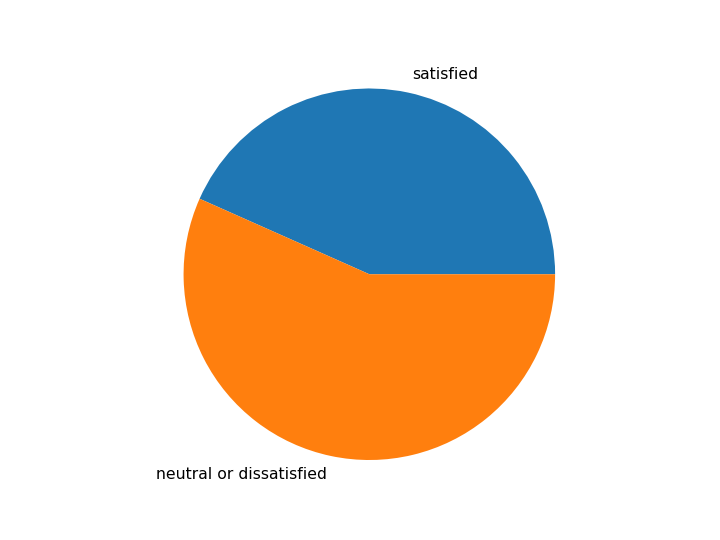

In [138]:
# Anem a veure si la nostra y està balancejada o no

num_rows = train_dataset.shape[0]
satisfied = 0
dissatisfied = 0

for i in range(0, num_rows):
    if(train_dataset.iloc[i]['satisfaction'] == 0.000):
        dissatisfied += 1
    if(train_dataset.iloc[i]['satisfaction'] == 1.000):
        satisfied += 1

plt.figure()
plt.pie([satisfied, dissatisfied], labels=["satisfied","neutral or dissatisfied"])
plt.axis("equal")
plt.show()

Podem veure que les dades de satisfacció estan balancejades, per

Anem a veure les  correlacions

In [ ]:
# Anem a veure les correlacions
import seaborn as sns
plt.figure(figsize=(20, 15))
sns.heatmap(train_dataset.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [ ]:
# Anem a veure quines variables estan més correlacionades amb la nostra variable y ('satisfaction')
train_dataset.corr().abs()['satisfaction'].sort_values(ascending = False)

De l'estudi anterior de la correlació dels atributs, ens crida l'atenció la correlació que hi ha entre l'atribut 'Departure Delay in Minutes' i l'atribut 'Arrival Delay in Minutes'. Té sentit, ja que si un vol surt amb retard, és logic que arribi amb retard. Anem a veure-ho amb una gràfica.

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train_dataset, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction', palette='flare', alpha=0.8)

Podem veure que l'atribut 'Departure Delay in Minutes' té una relació linial amb l'atribut 'Arrival Delay in Minutes'

A continuació estandaritzarem les dades

In [24]:
sc = StandardScaler()
scaled_xtrain = sc.fit_transform(x_train)
scaled_xtest = sc.transform(x_test)

# Fem un dataset de les dades de la x train i la x test
columnes = train_dataset.columns[:-1]
scaled_xtrain_dataset = pd.DataFrame(scaled_xtrain, columns = columnes)
scaled_xtest_dataset = pd.DataFrame(scaled_xtest, columns = columnes)

Anem a provar diferents models 

In [83]:
models = []
acc_models = []

In [130]:
# REGRESSIÓ LOGÍSTICA

reg_log = LogisticRegression()
reg_log.fit(scaled_xtrain, y_train)
y_predict1 = reg_log.predict(scaled_xtest)
accuracy1 = accuracy_score(y_test, y_predict1)
acc_models.append(accuracy1)
models.append("Reg. logística")
print("Accuracy:",accuracy1)

Accuracy: 0.8710462287104623


<IPython.core.display.Javascript object>


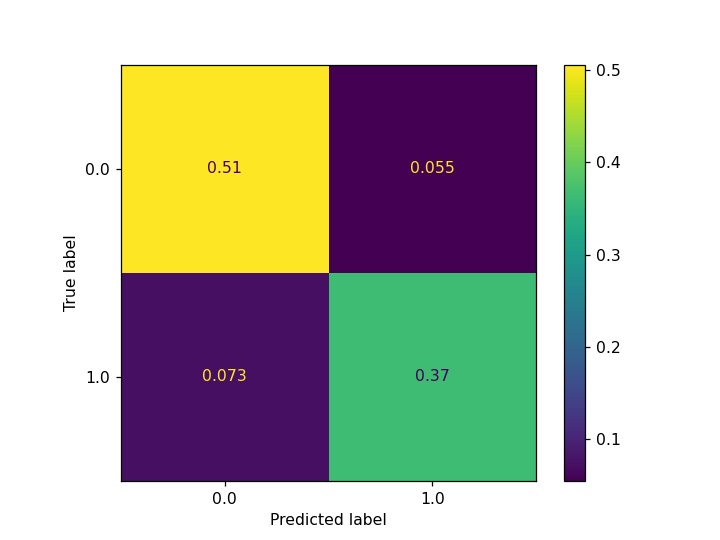

In [85]:
plot_confusion_matrix(reg_log,scaled_xtest,y_test,normalize = 'all')

<IPython.core.display.Javascript object>


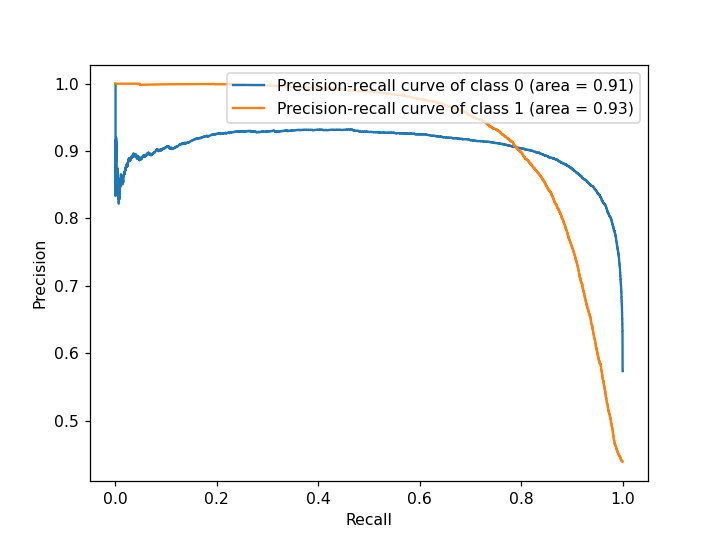

<IPython.core.display.Javascript object>


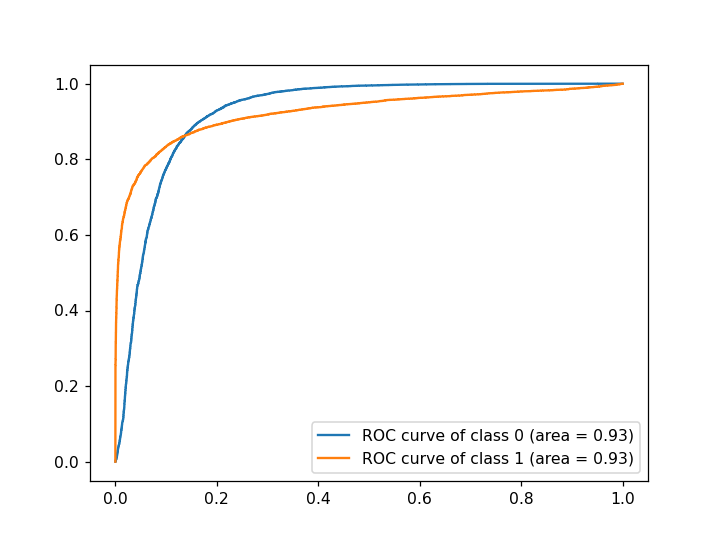

In [86]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

n_classes = 2
probs = reg_log.predict_proba(scaled_xtest)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [87]:
# DECISION TREE

decision_tree = DecisionTreeClassifier(max_depth=13, random_state=42) 
decision_tree.fit(scaled_xtrain, y_train)
y_predict2 = decision_tree.predict(scaled_xtest)
accuracy2 = accuracy_score(y_test, y_predict2)
acc_models.append(accuracy2)
models.append("Decision tree")
print("Accuracy",accuracy2)

Accuracy 0.9549299038350133


<IPython.core.display.Javascript object>


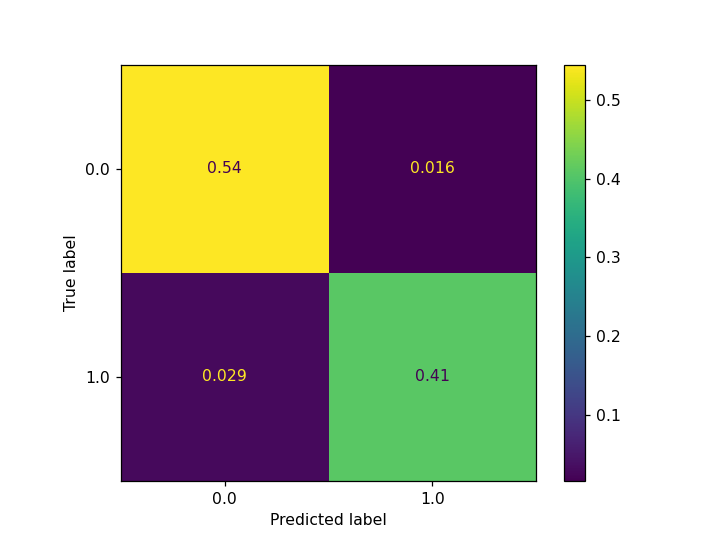

In [88]:
plot_confusion_matrix(decision_tree,scaled_xtest,y_test,normalize = 'all')

<IPython.core.display.Javascript object>


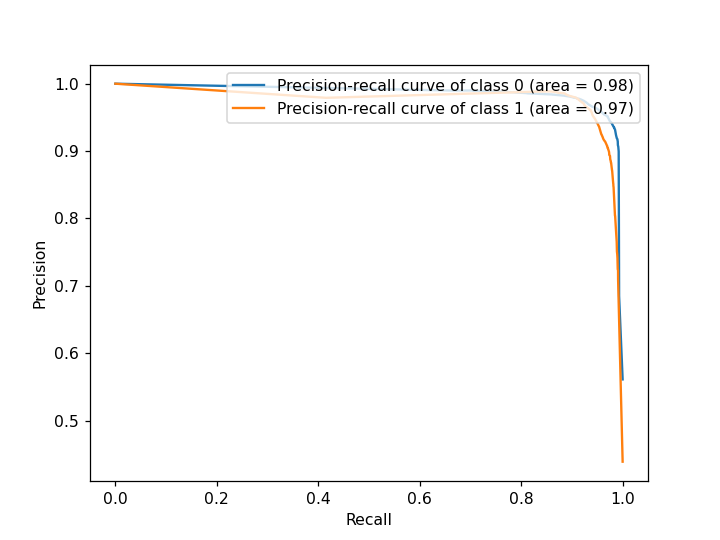

<IPython.core.display.Javascript object>


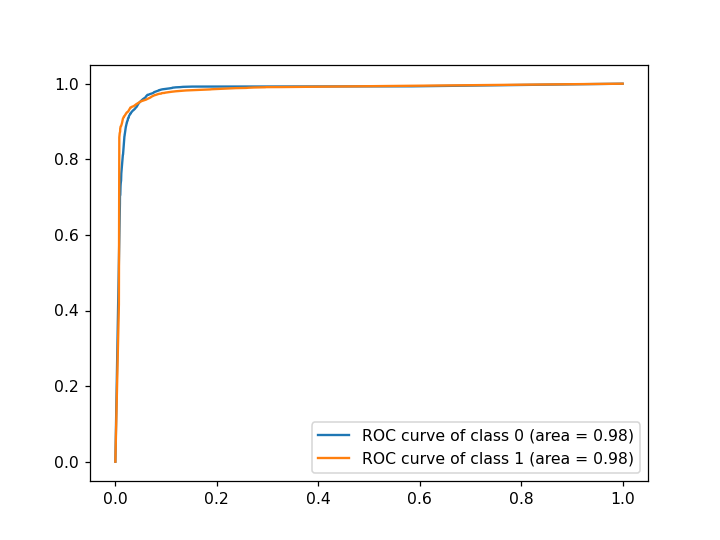

In [89]:
n_classes = 2
probs = decision_tree.predict_proba(scaled_xtest)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [90]:
# RANDOM FOREST

random_forest = RandomForestClassifier(max_depth=25, random_state=0,n_estimators= 1200) 
random_forest.fit(scaled_xtrain, y_train)
y_predict3 = random_forest.predict(scaled_xtest)
accuracy3 = accuracy_score(y_test, y_predict3)
acc_models.append(accuracy3)
models.append("Random forest")
print("Accuracy",accuracy3)

Accuracy 0.9632719267755764


<IPython.core.display.Javascript object>


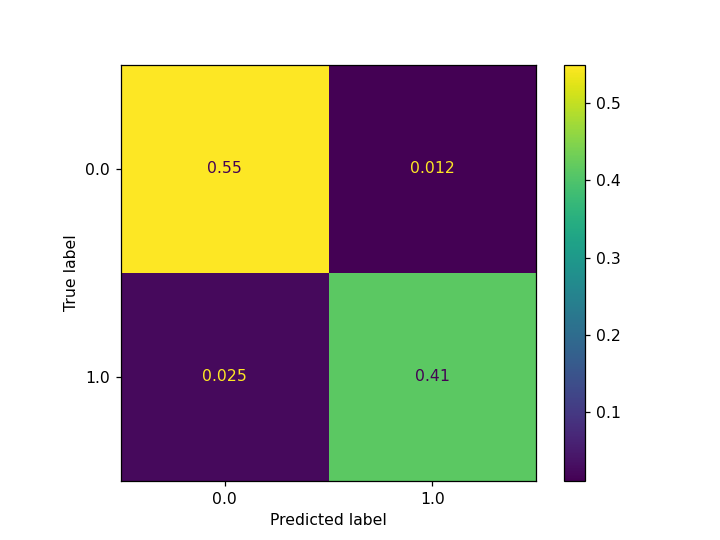

In [91]:
plot_confusion_matrix(random_forest,scaled_xtest,y_test,normalize = 'all')

<IPython.core.display.Javascript object>


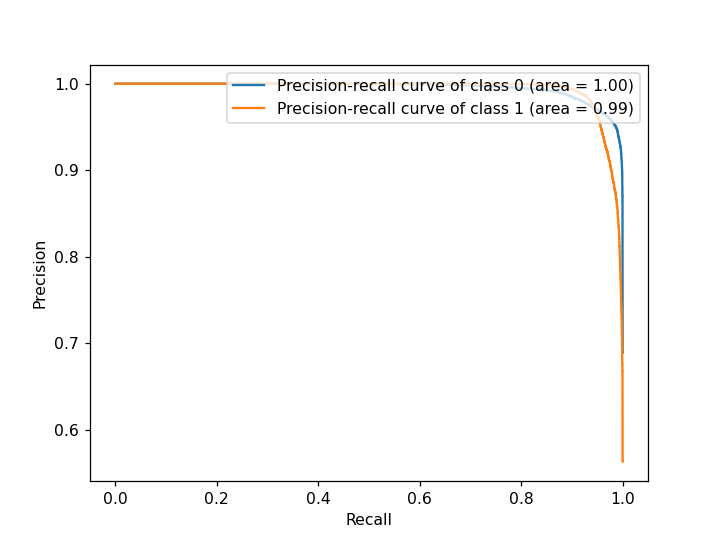

<IPython.core.display.Javascript object>


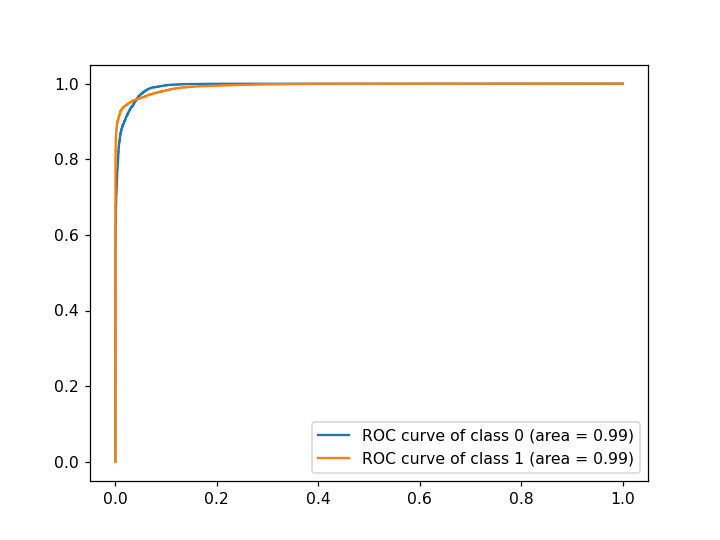

In [92]:
n_classes = 2
probs = random_forest.predict_proba(scaled_xtest)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [93]:
# XGBOOST

xgboost = XGBClassifier()
xgboost.fit(scaled_xtrain, y_train)
y_predict4 = xgboost.predict(scaled_xtest)
accuracy4 = accuracy_score(y_test, y_predict4)
acc_models.append(accuracy4)
models.append("XGBoost")
print("Accuracy:",accuracy4)

[12:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9630015834395397


<IPython.core.display.Javascript object>


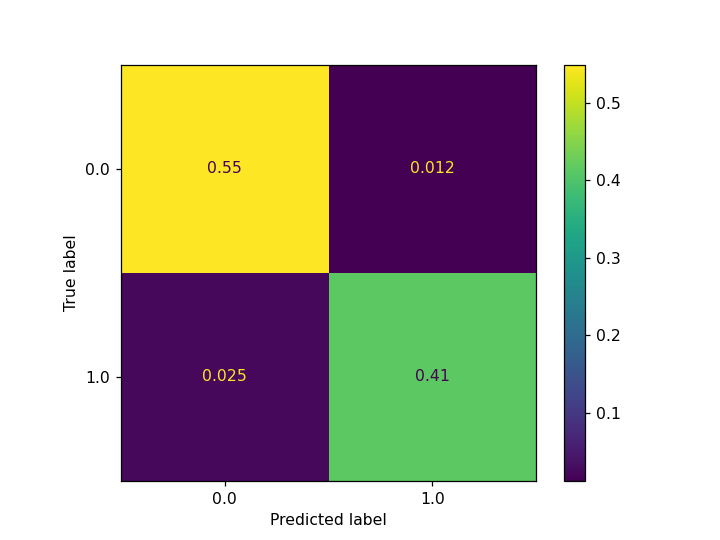

In [94]:
plot_confusion_matrix(xgboost,scaled_xtest,y_test,normalize = 'all')

<IPython.core.display.Javascript object>


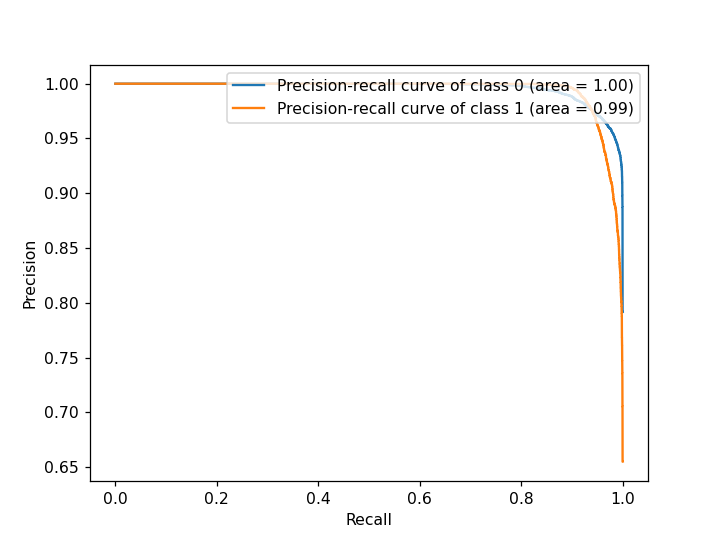

<IPython.core.display.Javascript object>


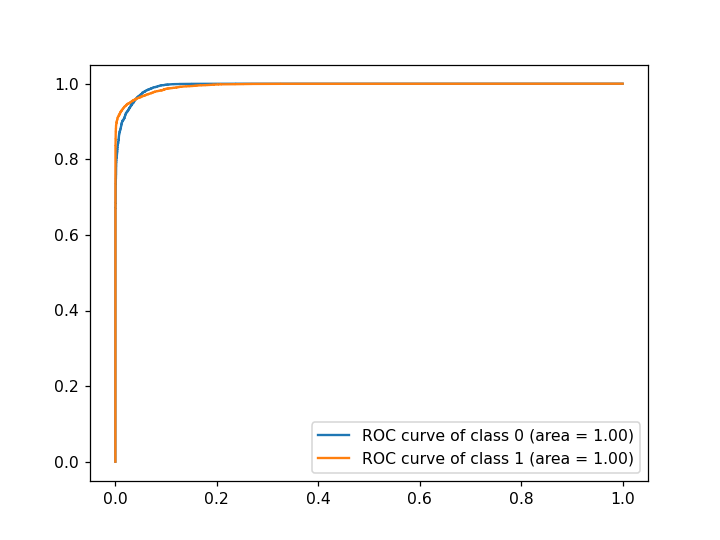

In [95]:
n_classes = 2
probs = xgboost.predict_proba(scaled_xtest)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [96]:
# KNN

knn = KNeighborsClassifier()
knn.fit(scaled_xtrain, y_train)
y_predict5 = knn.predict(scaled_xtest)
accuracy5 = accuracy_score(y_test, y_predict5)
acc_models.append(accuracy5)
models.append("KNN")
print("Accuracy:",accuracy5)

Accuracy: 0.928938323098907


<IPython.core.display.Javascript object>


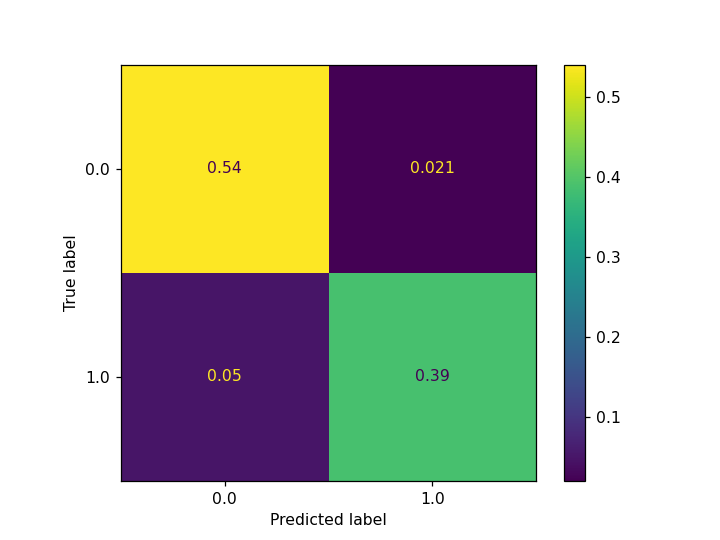

In [97]:
plot_confusion_matrix(knn,scaled_xtest,y_test,normalize = 'all')

<IPython.core.display.Javascript object>


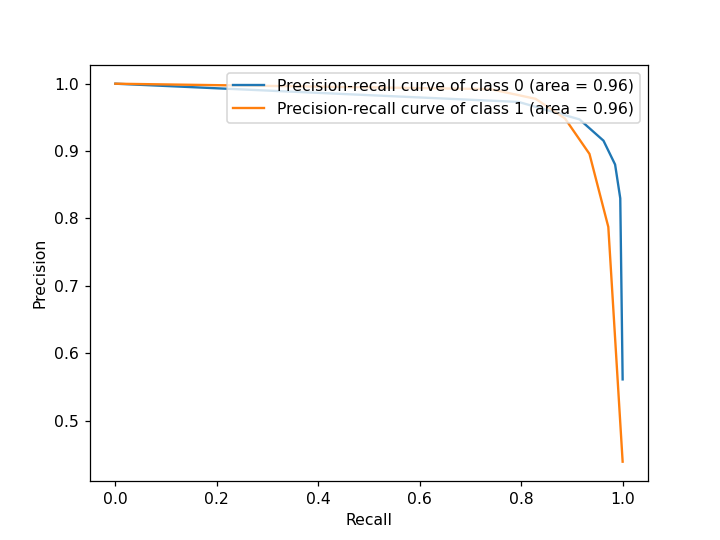

<IPython.core.display.Javascript object>


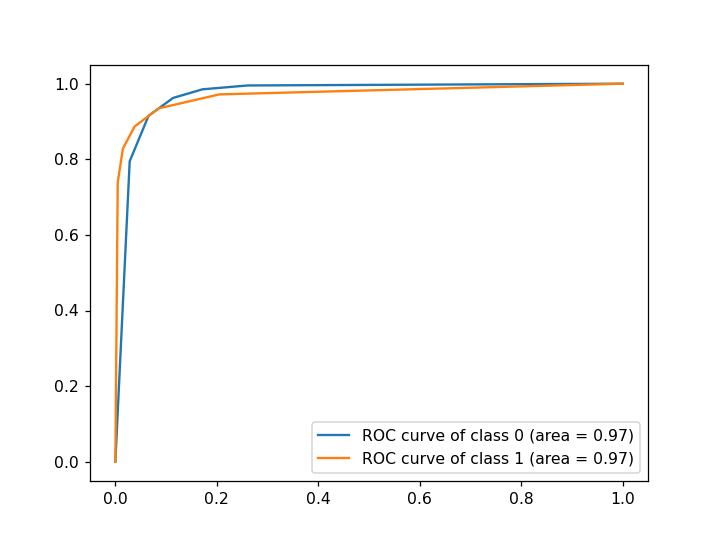

In [98]:
n_classes = 2
probs = knn.predict_proba(scaled_xtest)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [99]:
svc = SVC(random_state=2)
svc.fit(scaled_xtrain, y_train)
y_predict6 = svc.predict(scaled_xtest)
accuracy6 = accuracy_score(y_test, y_predict6)
acc_models.append(accuracy6)
models.append("SVC")
print("Accuracy:",accuracy6)

Accuracy: 0.9551616266944735


<IPython.core.display.Javascript object>


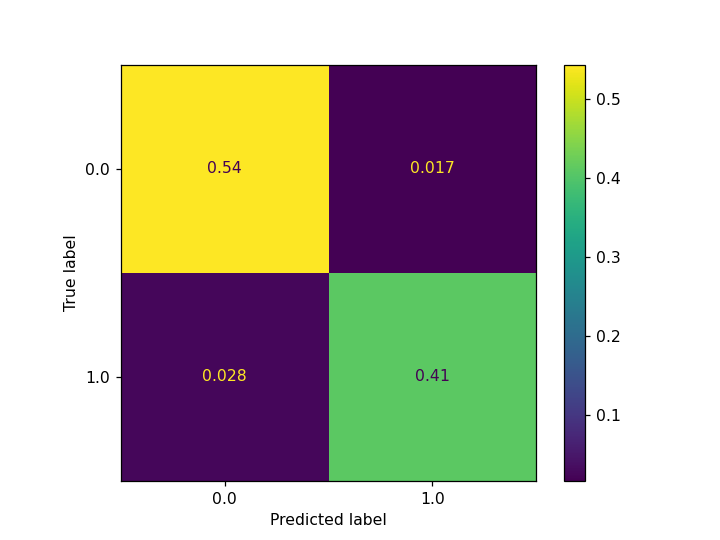

In [100]:
plot_confusion_matrix(svc,scaled_xtest,y_test,normalize = 'all')

<IPython.core.display.Javascript object>


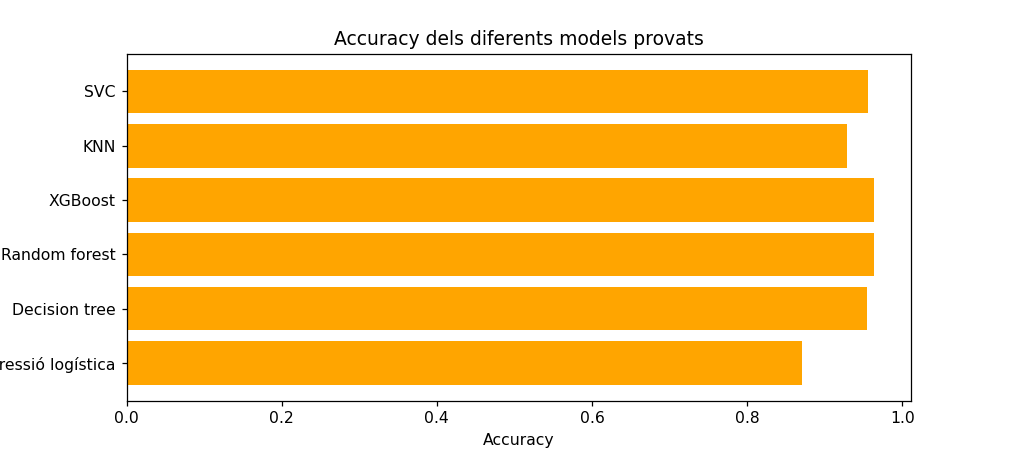

Text(0.5, 1.0, 'Accuracy dels diferents models provats')

In [129]:
# G
plt.figure(figsize=(9,4))
plt.barh(models,acc_models, color = 'orange')
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Accuracy dels diferents models provats')

In [41]:
# Anem a provar de fer un PCA amb el XGBoost

accuracys = []
for i in range(1,23):
    pca = PCA(i)
    pca_x = pca.fit_transform(scaled_xtrain)
    
    linear_model = XGBClassifier()
    linear_model.fit(pca_x, y_train)
    preds = linear_model.predict(pca_x)

    acc = accuracy_score(preds, y_train)   
    accuracys.append(acc)
    

[11:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [48]:
for i in range(0,22):
    print(f"PCA_{i+1} - accuracy: {accuracys[i]:.3f}")

PCA_1 - accuracy: 0.795
PCA_2 - accuracy: 0.835
PCA_3 - accuracy: 0.853
PCA_4 - accuracy: 0.877
PCA_5 - accuracy: 0.901
PCA_6 - accuracy: 0.925
PCA_7 - accuracy: 0.931
PCA_8 - accuracy: 0.938
PCA_9 - accuracy: 0.941
PCA_10 - accuracy: 0.944
PCA_11 - accuracy: 0.947
PCA_12 - accuracy: 0.949
PCA_13 - accuracy: 0.952
PCA_14 - accuracy: 0.953
PCA_15 - accuracy: 0.956
PCA_16 - accuracy: 0.958
PCA_17 - accuracy: 0.961
PCA_18 - accuracy: 0.965
PCA_19 - accuracy: 0.965
PCA_20 - accuracy: 0.970
PCA_21 - accuracy: 0.971
PCA_22 - accuracy: 0.970


<IPython.core.display.Javascript object>


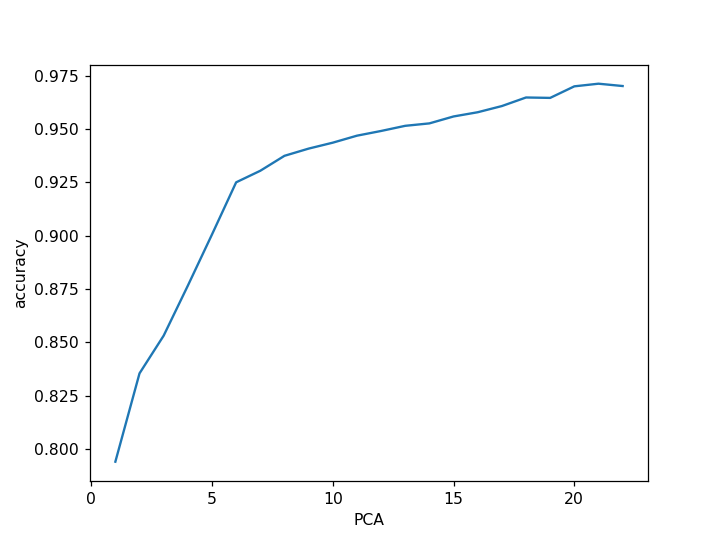

In [40]:
plt.figure()
plt.xlabel("PCA")
plt.ylabel("accuracy")
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],accuracys)

<IPython.core.display.Javascript object>


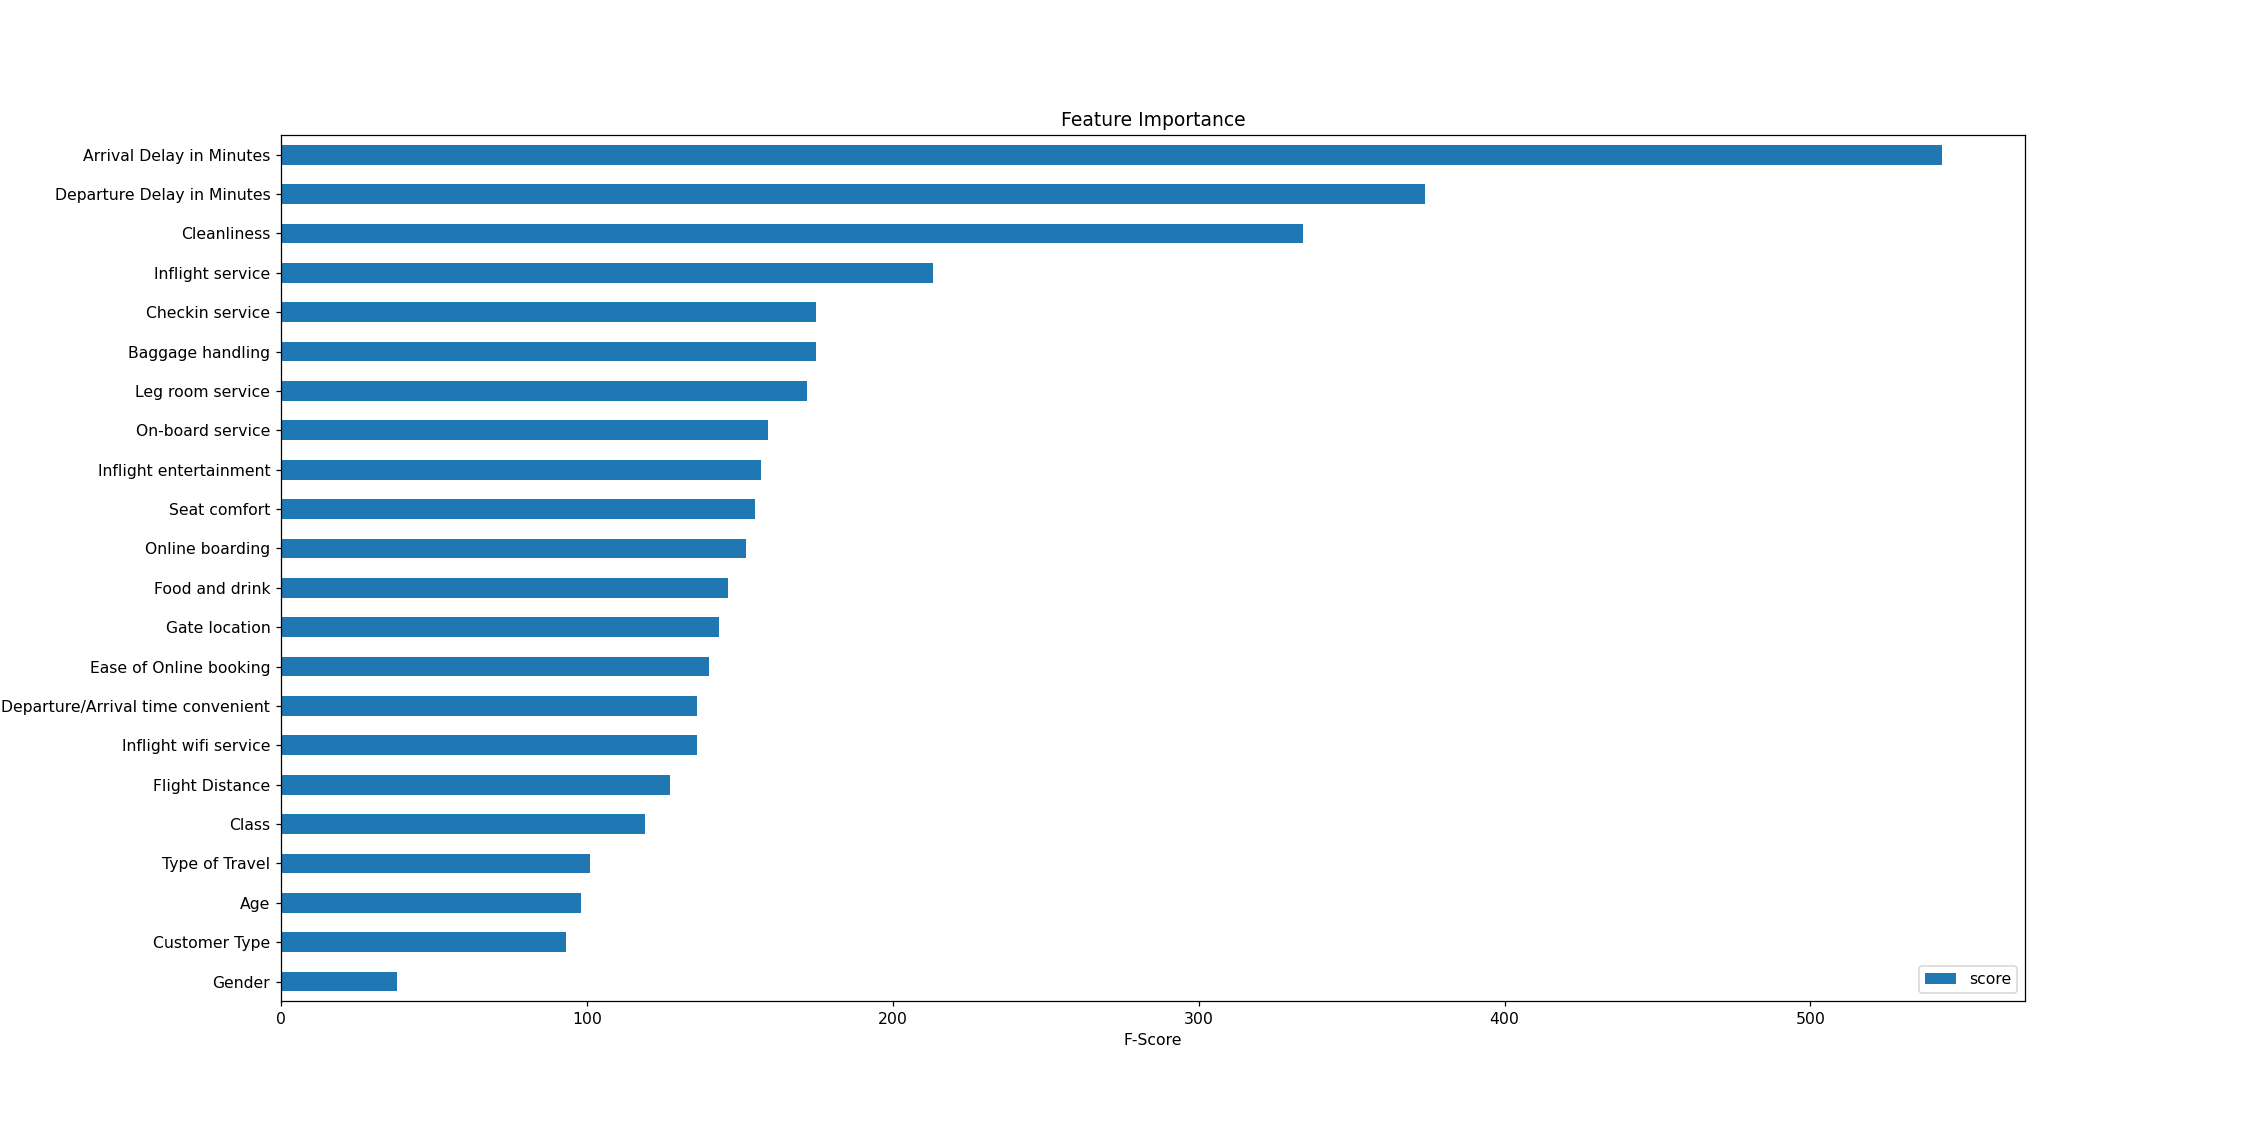

Text(0.5, 1.0, 'Feature Importance')

In [137]:
orig_feature_names = scaled_xtrain_dataset.columns
feature_important = xgboost.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")#, ascending=False)
ax =data.plot(kind='barh', figsize = (20,10))
ax.set_yticklabels(orig_feature_names); ## plot top features
#ax.set_xlabel("F-Score")
ax.set(xlabel="F-Score", ylabel="y label")
ax.set_title('Feature Importance')